# Introduction: Hotel booking demand

Каждый раз, собираясь в отпуск, люди ищут подходящий отель для бронирования, а предприниматели в свою очередь пытаются предложить лучшие варианты отелей на рынке и сделать свои отели более привлекательными для клиентов и более рентабельными для себя.

Отмена бронирования номеров — может стать большой проблемой для туристического бизнеса, так как это влияет на рейтинг отелей, а также на получение прибыли.

Алгоритмы машинного обучения могут помочь в повышение эффективности работы отелей и заранее выявлять клиентов, которые могут потенциально отменить бронирование и выработать стратегии работы с такими клиентами.

Вам предлагается разработать алгоритм машинного обучения, который позволит определять отменит клиент бронирование или нет.

## Data

Данные содержат сведения о спросе на отели. Датасет содержит **119 390** наблюдений. Каждое наблюдение представляет собой бронирование отеля. Набор данных учитывает бронирования, которые должны прибыть в период с 1 июля 2015 года по 31 августа 2017 года, включая фактически поступившие и отмененные бронирования.

Данные содержат сведения о 68 163 отелях.

* **Тренировочный** набор - 44 638 строк.
* **Тестовый набор** - 23 525 строк.

### Files

* **train.csv** - the training set
* **test.csv** - the test set

### Columns information

* ADR - Средняя цена за номер/ночь.
* Adults - Кол-во взрослых
* Agent - ID туристического агентства, которое сделало заказ
* ArrivalDateDayOfMonth
* rrivalDateMonth
* ArrivalDateWeekNumber
* ArrivalDateYear
* AssignedRoomType - Код для типа номера, назначенного для бронирования. Иногда назначенный тип номера отличается от типа зарезервированного номера по причинам, связанным с работой отеля (например, из-за избыточного бронирования) или по запросу клиента
* Babies - Количество младенцев
* BookingChanges - Количество изменений / дополнений, внесенных в бронирование с момента внесения бронирования в систему до момента заселения или отмены
* Children - Количество детей
* Company - ID компании / юридического лица, совершившего бронирование или ответственного за его оплату
* Country - Страна
* CustomerType - Тип бронирования, предполагающий одну из четырех категорий: Contract, Group, Transient, Transient-party
* DaysInWaitingList - Количество дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту
* DepositType - Индикация того, внес ли клиент залог для гарантии бронирования. Эта переменная может принимать три категории:
    * No Deposit – депозит не вносился
    * Non Refund - внесен залог в размере полной стоимости проживания
    * Refundable - внесен залог в размере, меньшем общей стоимости проживания
* DistributionChannel - Канал распространения бронирования. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры»
* IsCanceled - Значение, указывающее, было ли бронирование отменено (1) или нет (0)
* IsRepeatedGuest - Значение, указывающее, было ли имя бронирования от повторного гостя (1) или нет (0)
* LeadTime - Количество дней, прошедших между датой ввода бронирования в систему и датой прибытия
* MarketSegment - Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры»
* Meal - Тип забронированного питания. Категории представлены в стандартных пакетах гостеприимства:
    * Undefined / SC - без питания;
    * BB - завтрак;
    * HB - завтрак и еще один прием пищи - обычно ужин);
    * FB - завтрак, обед и ужин
* PreviousBookingsNotCanceled - Количество предыдущих бронирований, которые не были отменены клиентом до текущего бронирования
* PreviousCancellations - Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
* RequiredCardParkingSpaces - Количество машиномест, требуемых заказчиком
* ReservationStatusDate - Дата, когда был установлен последний статус. Эта переменная может использоваться вместе с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля
* ReservedRoomType - Код типа номера забронирован
* StaysInWeekendNights - Количество ночей в выходные (суббота или воскресенье), которые гость проживал или забронировал для проживания в отеле
* StaysInWeekNights - Количество ночей в неделю (с понедельника по пятницу), которые гость останавливался или забронировал для проживания в отеле
* TotalOfSpecialRequests - Количество особых запросов, сделанных клиентом (например, две односпальные кровати или высокий этаж)

### Imports and loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
train_df = pd.read_csv("../pythonProject/datasets/train_final.csv")
test_df = pd.read_csv("../pythonProject/datasets/test_final.csv")

train_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


## Exploratory Data Analisys (EDA)

<Axes: >

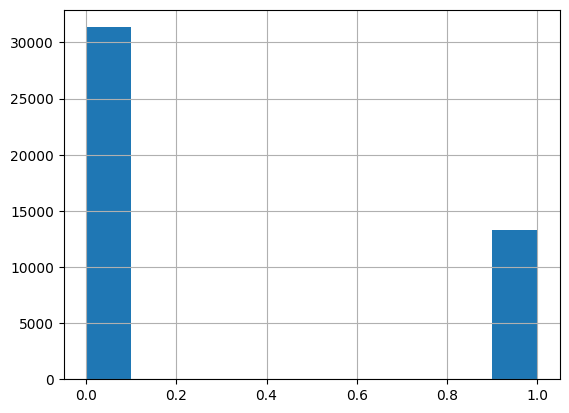

In [4]:
train_df['is_canceled'].value_counts()
train_df['is_canceled'].hist()

### S

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

### Time for encoding

In [6]:
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

hotel                        2
arrival_date_month          12
meal                         5
country                    156
market_segment               7
distribution_channel         4
reserved_room_type           9
assigned_room_type          11
deposit_type                 3
customer_type                4
reservation_status_date    890
dtype: int64

In [7]:
train_df.select_dtypes('object').head(15)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
5,Resort Hotel,March,HB,DEU,Groups,Direct,E,G,No Deposit,Transient,2016-03-06
6,Resort Hotel,December,HB,AUS,Offline TA/TO,TA/TO,D,D,No Deposit,Transient-Party,2015-12-29
7,Resort Hotel,July,HB,CHE,Online TA,TA/TO,D,D,No Deposit,Transient-Party,2017-07-18
8,City Hotel,October,HB,DEU,Offline TA/TO,TA/TO,A,E,No Deposit,Transient-Party,2015-10-18
9,Resort Hotel,April,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,2017-04-28


There are too much countries and only hotels. I think that there's no reason to keep them here and try to encode so im gonna drop it.

In [10]:
train_df.drop(['hotel', 'country'], axis=1)
test_df.drop(['hotel', 'country'], axis=1)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,73,2016,July,28,6,0,2,1,0.0,0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,37,2015,October,43,24,2,5,1,1.0,0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,190,2017,April,14,6,2,3,2,0.0,0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,287,2016,August,35,24,1,4,2,0.0,0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,386,2016,October,43,20,1,3,2,0.0,0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,180,2016,May,22,23,1,5,2,0.0,0,...,A,A,0,No Deposit,0,Transient,80.75,0,0,2016-05-29
23521,4,2016,November,45,1,0,3,1,0.0,0,...,A,A,0,No Deposit,0,Transient,65.00,0,1,2016-11-04
23522,3,2016,May,21,16,1,1,1,0.0,0,...,A,A,0,No Deposit,0,Transient,65.00,0,0,2016-05-18
23523,312,2017,March,10,5,2,5,2,0.0,0,...,A,A,0,No Deposit,0,Transient-Party,30.00,0,0,2017-01-11
